<a href="https://colab.research.google.com/github/aenoboa1/Draft_ML_EmotionAPP/blob/main/Main_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de ML para la deteccion de Emociones


Flujo de trabajo a seguir en este proyecto:

1. Mirando el panorama general.
2. Obtenga los datos.
3. Descubra y visualice los datos para obtener información.
4. Prepare los datos para los algoritmos de Machine Learning.
5. Seleccione un modelo y entrénelo.
6. Ajuste su modelo.
7. Presente su solución.
8. Inicie, supervise y mantenga su sistema 

# 1. Mirando el panorama general.


El proyecto se centra en desarrollar un modelo supervisado usando machine learning para el reconocimiento facial de emociones para medir el «Student Engagement» en estudiantes que se encuentren en un ambiente online learning. Los procesos para la ejecución del proyecto serán, realizar el entrenamiento de un modelo CNN utilizando imágenes de rostros que se encuentren en dataset de libre acceso   para realizar la clasificación de emociones.


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import math
import os
import seaborn as sns
#matplotlib styles
plt.style.use(['ggplot'])
sns.set(rc={'figure.figsize':(10,10)})


# 2. Obtener los datos:

In [2]:
from google.colab import drive


In [3]:
drive._mount('/content/drive')


Mounted at /content/drive


### Cargar DATASET DAiSEE Drive-> Colab

In [24]:
! rm -rf   /content/DAiSEE

In [ ]:
# Install colab_ssh on google colab
!pip install colab_ssh --upgrade

from colab_ssh import launch_ssh
launch_ssh('21v23nE9rkUZAwWwJZ1zAxGLuwK_7v2uhNRStUAsGmaEtCm5D', 'ml')


we highly recommend that update your code by following this documentation https://github.com/WassimBenzarti/colab-ssh#getting-started
Successfully running 4.tcp.ngrok.io:14425
[Optional] You can also connect with VSCode SSH Remote extension using this configuration:

  Host google_colab_ssh
    HostName 4.tcp.ngrok.io
    User root
    Port 14425
    


In [ ]:
import os

# dataset

os.chdir("/content/drive/MyDrive/DATA/datasets/DAiSEE/Data")


# !unzip DAiSEE.zip -d /home/daisee/


!ls


Data  extractFrames.py	Test.txt  Train.txt  Validation.txt


## Data Selection

**DaiSEE: Dataset for Affective States in E-Environments**

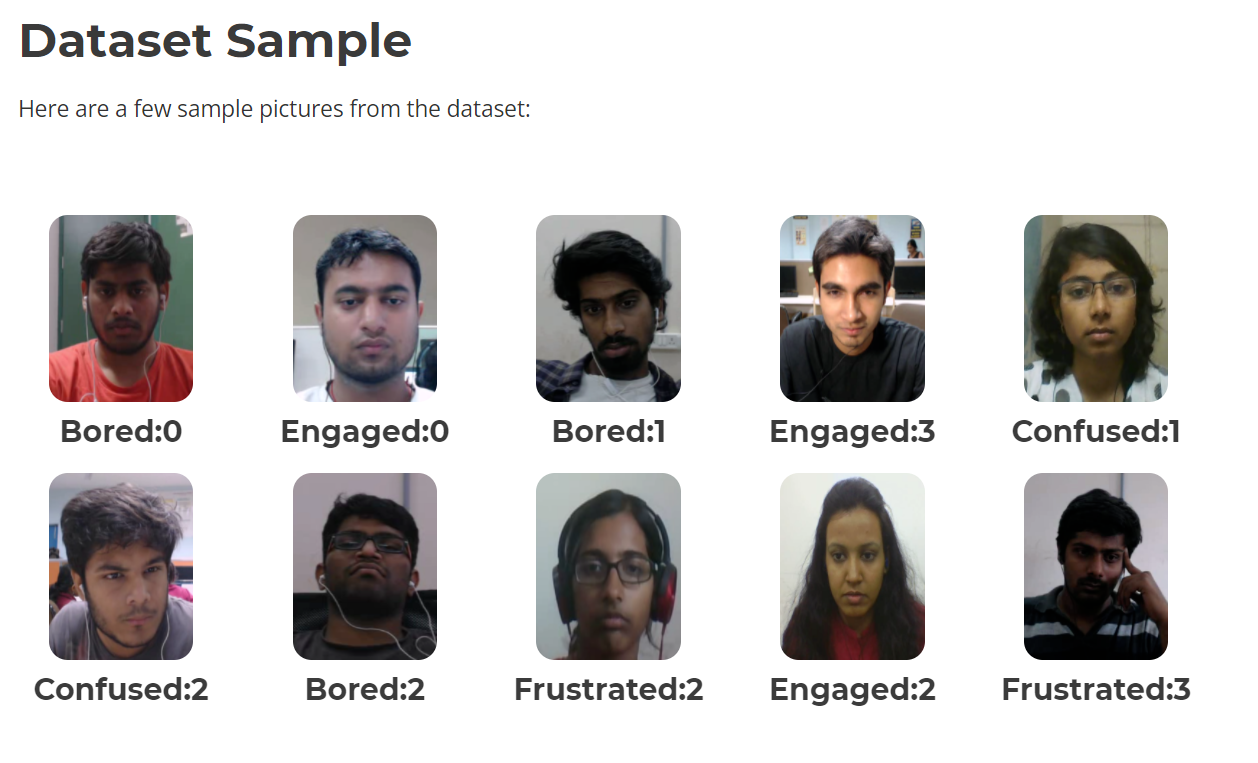

In [ ]:
# descargando el dataset DAiSEE
os.chdir("/content/drive/MyDrive/DATA/datasets/")

## Descargando archivos de drive usando `gdown`


In [ ]:
!gdown https://drive.google.com/u/0/uc?id=1yrk_wyhZ-c7q0Mcyyi888ylFkl_JDELi&export=download

File ‘uc?id=1yrk_wyhZ-c7q0Mcyyi888ylFkl_JDELi’ already there; not retrieving.



## Extrayendo los Frames del Dataset

In [ ]:
extractFrames()

In [ ]:
!ls -l

total 139
drwx------ 2 root root  4096 Dec  7 13:58 Data
-rw------- 1 root root  1123 Apr  6  2018 extractFrames.py
-rw------- 1 root root 27969 Sep 25  2017 Test.txt
-rw------- 1 root root 82082 Apr  6  2018 Train.txt
-rw------- 1 root root 25847 Sep 25  2017 Validation.txt


In [ ]:
!sudo apt-get install ffmpeg 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
def extractFrames():
  import os
  import subprocess

  dataset = os.listdir('Data/')

  def split_video(video_file, image_name_prefix, destination_path):
      return subprocess.check_output('ffmpeg -i "' + destination_path+video_file + '" ' + image_name_prefix + '%d.jpg -hide_banner', shell=True, cwd=destination_path)

  for ttv in dataset:
      users = os.listdir('Data/'+ttv+'/')
      for user in users:
          currUser = os.listdir('Data/'+ttv+'/'+user+'/')
          for extract in currUser:
              clip = os.listdir('Data/'+ttv+'/'+user+'/'+extract+'/')[0]
              print (clip[:-4])
              path = os.path.abspath('.')+'/Data/'+ttv+'/'+user+'/'+extract+'/'
              split_video(clip, clip[:-4], path)

  print ("================================================================================\n")
  print ("Frame Extraction Successful")

In [4]:

# NOTA: This may take a while         
!mkdir /content/DAiSEE ; unzip  -qq /content/drive/MyDrive/DAiSEE.zip -d /content/DAiSEE

## Exploratory Data Analysis de DAiSEE

In [78]:
def folders_in(path_to_parent):
    for fname in os.listdir(path_to_parent):
        if os.path.isdir(os.path.join(path_to_parent,fname)):
            yield os.path.join(path_to_parent,fname)

test_list = list(folders_in("/content/DAiSEE/DAiSEE/DataSet/Data/Test"))
test_list



['/content/DAiSEE/DAiSEE/DataSet/Data/Test/907001',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/928901',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/882654',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510038',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510035',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510037',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510045',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510034',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/500044',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510046',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510009',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510040',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/500067',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/826412',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/500095',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/998826',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510047',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510042',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510036',
 '/content/D

In [91]:
def probar_dir(test_list):
  for a in test_list:
    if not os.listdir(a) :
      print("El Directorio esta vacio")
    else:    
      print("El directorio no esta vacio")

In [92]:
probar_dir(test_list)

El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio


In [87]:
train_list = list(folders_in("/content/DAiSEE/DAiSEE/DataSet/Data/Train"))
train_list


['/content/DAiSEE/DAiSEE/DataSet/Data/Train/110007',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/310073',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/110016',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/110008',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/110014',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/310063',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/310070',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/310072',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/310071',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/310062',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/110005',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/411031',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/110017',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/401835',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/310080',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/111003',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/181374',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/110013',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Train/33

In [93]:
probar_dir(train_list)

El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no est

In [90]:
test_list = list(folders_in("/content/DAiSEE/DAiSEE/DataSet/Data/Test"))
test_list

['/content/DAiSEE/DAiSEE/DataSet/Data/Test/907001',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/928901',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/882654',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510038',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510035',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510037',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510045',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510034',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/500044',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510046',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510009',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510040',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/500067',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/826412',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/500095',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/998826',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510047',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510042',
 '/content/DAiSEE/DAiSEE/DataSet/Data/Test/510036',
 '/content/D

In [94]:
probar_dir(test_list)

El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio
El directorio no esta vacio


In [35]:
df = pd.read_csv('/content/DAiSEE/DAiSEE/Labels/TrainLabels.csv')

In [36]:
df

,ClipID,Boredom,Engagement,Confusion,Frustration
0,1100011002.avi,0,2,0,0
1,1100011003.avi,0,2,0,0
2,1100011004.avi,0,3,0,0
3,1100011005.avi,0,3,0,0
4,1100011006.avi,0,3,0,0
...,...,...,...,...,...
5353,4599990246.avi,0,3,0,0
5354,4599990247.avi,0,3,0,0
5355,4599990248.avi,1,2,1,1
5356,4599990249.avi,0,3,0,0


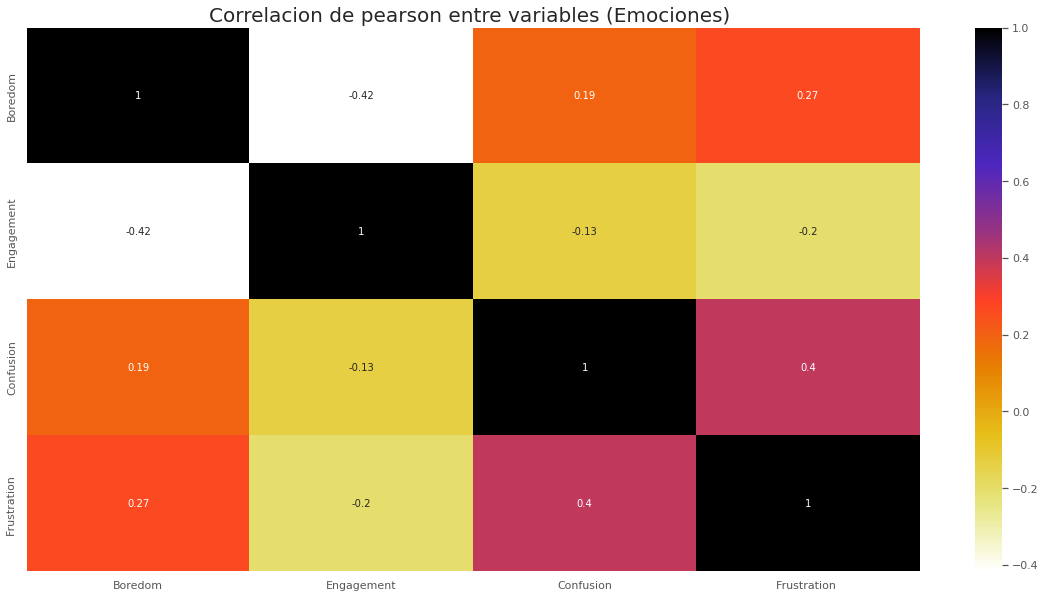

In [37]:
import seaborn as sns
# Using pearson correlation
plt.figure(figsize=(20, 10))
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.title("Correlacion de pearson entre variables (Emociones) ",fontsize=20)
plt.show()

### Distribucion de las emociones:

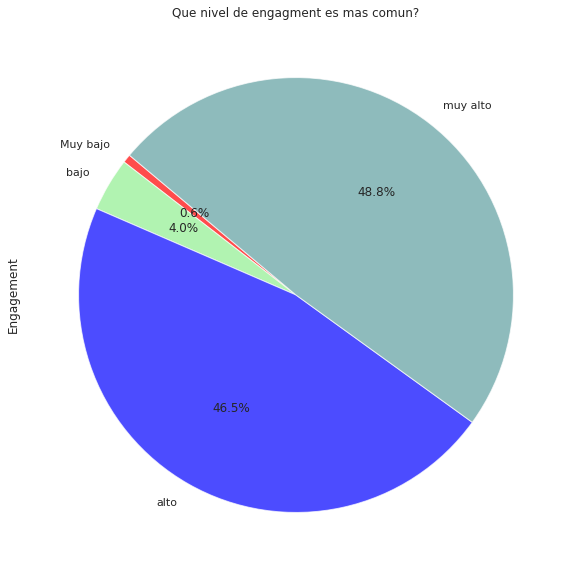

In [46]:
labels = ['Muy bajo','bajo','alto','muy alto']



df['Engagement'].value_counts().sort_values().plot.pie(
    labels=labels, autopct='%1.1f%%', figsize=(10,10),title='Que nivel de engagment es mas comun?',colors=['red','#90EE90','blue',"#5F9EA0"],wedgeprops={'alpha':0.7}, startangle=140)


In [39]:
df['Engagement'].value_counts().sort_values()

0      34
1     213
3    2494
2    2617
Name: Engagement, dtype: int64

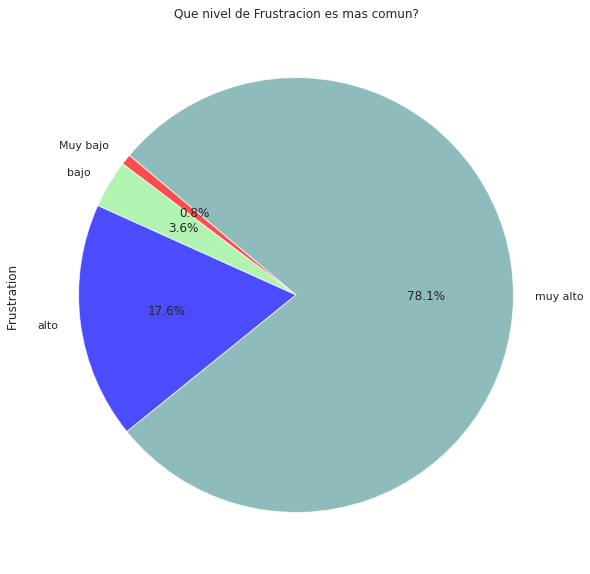

In [45]:
labels = ['Muy bajo','bajo','alto','muy alto']



df['Frustration '].value_counts().sort_values().plot.pie(
    labels=labels, autopct='%1.1f%%', title='Que nivel de Frustracion es mas comun?',colors=['red','#90EE90','blue',"#5F9EA0"],wedgeprops={'alpha':0.7}, startangle=140)

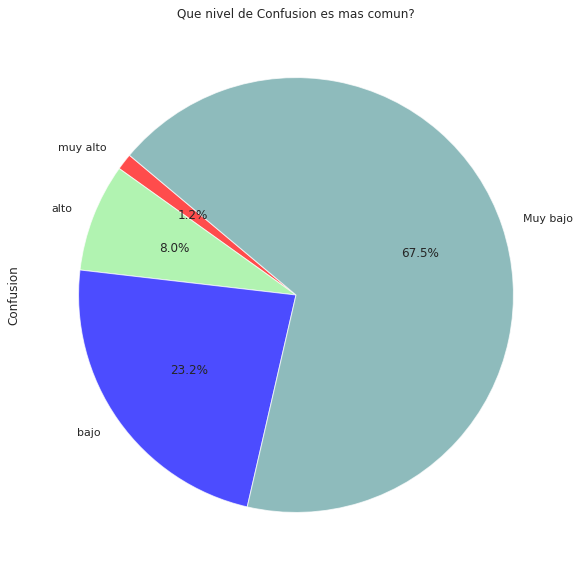

In [47]:
labels = ['muy alto',
          'alto',
          'bajo',
          'Muy bajo']

df['Confusion'].value_counts().sort_values().plot.pie(
    labels=labels, autopct='%1.1f%%', title='Que nivel de Confusion es mas comun?',colors=['red','#90EE90','blue',"#5F9EA0"],wedgeprops={'alpha':0.7}, startangle=140)



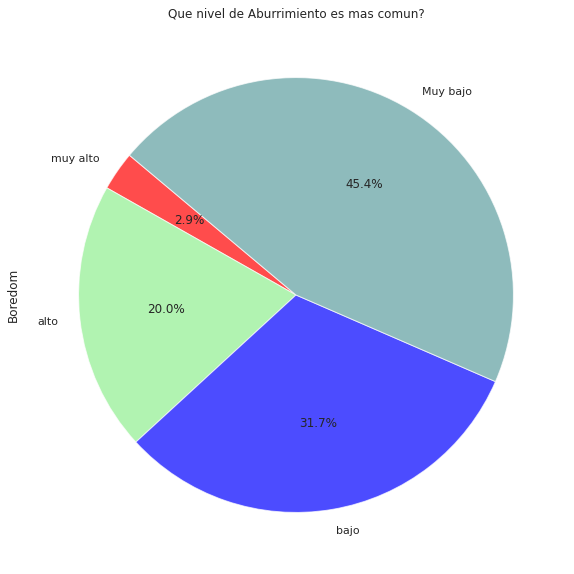

In [48]:
labels = ['muy alto',
          'alto',
          'bajo',
          'Muy bajo']

df['Boredom'].value_counts().sort_values().plot.pie(
    labels=labels, autopct='%1.1f%%', title='Que nivel de Aburrimiento es mas comun?',colors=['red','#90EE90','blue',"#5F9EA0"],wedgeprops={'alpha':0.7}, startangle=140)



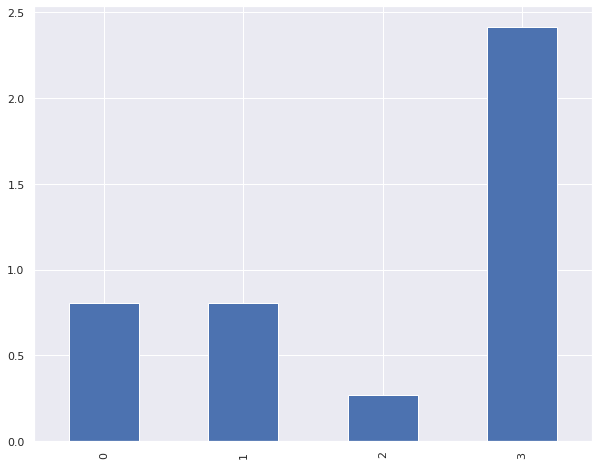

In [59]:

s= pd.Series([df['Boredom'].mean(),df['Boredom'].mean() ,df['Frustration '].mean() ,df['Engagement'].mean()])
labels = ['Aburrimiento','Aburrimiento','Frustracion','Engagement']
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111)


s.plot.bar('bar')


## Facial Keypoints detection

1. EDA y cargando datos:

In [29]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"andrewnoboa","key":"f4de249eb7b2d574a8ba009c0a954a40"}'}

In [31]:
!pip install -q kaggle ;  mkdir -p ~/.kaggle ; cp kaggle.json ~/.kaggle/ ; chmod 600 ~/.kaggle/kaggle.json

In [36]:
train_data = pd.read_csv('training.zip', compression='zip', header=0, sep=',', quotechar='"')
test_data = pd.read_csv('test.zip', compression='zip', header=0, sep=',', quotechar='"')
lookid_data = pd.read_csv('IdLookupTable.csv',header=0, sep=',', quotechar='"')

In [37]:
train_data.head(18).T.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mouth_center_top_lip_x,43.3126,46.6846,47.2749,50.3032,44.9627,49.3081,45.1277,48.1002,49.2134,49.2702,46.4694,48.504,49.0743,46.4828,45.5318,49.7035,50.2722,50.2808
mouth_center_top_lip_y,72.9355,70.2666,70.1918,70.0917,73.7074,78.4876,65.0996,71.2786,67.648,67.5428,65.2601,72.7792,68.3558,63.542,70.5507,71.2326,71.7967,70.2554
mouth_center_bottom_lip_x,43.1307,45.4679,47.2749,51.5612,44.2271,49.4324,45.4157,48.5168,49.4995,49.5452,46.2068,47.7888,49.6389,46.2024,44.7789,49.4231,50.5878,49.6889
mouth_center_bottom_lip_y,84.4858,85.4802,78.6594,78.2684,86.8712,93.8988,78.057,91.0639,83.0931,76.8935,81.6978,94.588,83.88,74.198,84.4749,85.814,82.5226,80.6115
Image,238 236 237 238 240 240 239 241 241 243 240 23...,219 215 204 196 204 211 212 200 180 168 178 19...,144 142 159 180 188 188 184 180 167 132 84 59 ...,193 192 193 194 194 194 193 192 168 111 50 12 ...,147 148 160 196 215 214 216 217 219 220 206 18...,167 169 170 167 156 145 106 68 52 24 20 15 21 ...,109 109 125 141 145 139 120 81 45 34 31 35 36 ...,178 177 178 179 179 179 181 185 188 184 192 20...,164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...,226 227 225 224 221 220 215 210 210 208 206 18...,52 51 54 57 57 56 55 55 56 59 62 66 67 72 79 8...,142 124 123 133 140 147 151 147 137 136 125 12...,86 93 106 114 112 110 111 113 138 147 148 132 ...,75 65 63 75 70 78 84 97 106 71 39 25 23 21 18 ...,119 106 101 106 89 66 67 72 85 112 118 109 96 ...,52 54 74 76 55 48 47 41 38 37 34 33 33 31 30 3...,201 200 202 193 124 59 53 50 48 56 66 76 114 1...,202 201 201 202 201 200 200 200 199 200 173 74...


In [38]:
pd.Series(train_data.columns)

0             left_eye_center_x
1             left_eye_center_y
2            right_eye_center_x
3            right_eye_center_y
4       left_eye_inner_corner_x
5       left_eye_inner_corner_y
6       left_eye_outer_corner_x
7       left_eye_outer_corner_y
8      right_eye_inner_corner_x
9      right_eye_inner_corner_y
10     right_eye_outer_corner_x
11     right_eye_outer_corner_y
12     left_eyebrow_inner_end_x
13     left_eyebrow_inner_end_y
14     left_eyebrow_outer_end_x
15     left_eyebrow_outer_end_y
16    right_eyebrow_inner_end_x
17    right_eyebrow_inner_end_y
18    right_eyebrow_outer_end_x
19    right_eyebrow_outer_end_y
20                   nose_tip_x
21                   nose_tip_y
22          mouth_left_corner_x
23          mouth_left_corner_y
24         mouth_right_corner_x
25         mouth_right_corner_y
26       mouth_center_top_lip_x
27       mouth_center_top_lip_y
28    mouth_center_bottom_lip_x
29    mouth_center_bottom_lip_y
30                        Image
dtype: o

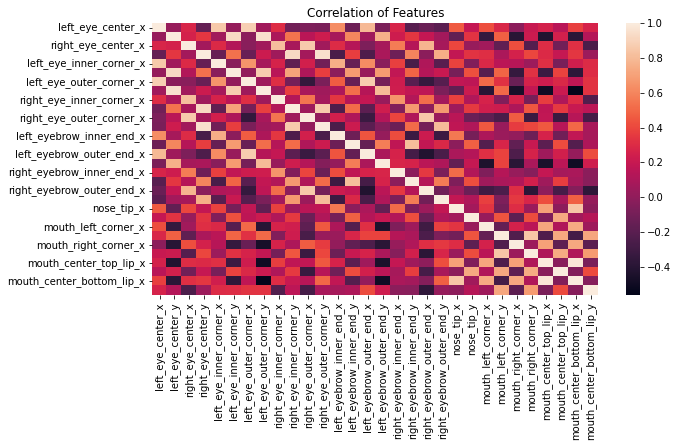

In [45]:
plt.figure(figsize =(10,5))
sns.heatmap(train_data.corr())
plt.title("Correlation of Features")
plt.show()

### Importar los Data Frames de Facial keypoints usando Pandas

In [89]:
train_data = pd.read_csv('training.zip', compression='zip', header=0, sep=',', quotechar='"')
test_data = pd.read_csv('test.zip', compression='zip', header=0, sep=',', quotechar='"')
lookid_data = pd.read_csv('IdLookupTable.csv',header=0, sep=',', quotechar='"')

In [90]:
train_data.head(18).T.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mouth_center_top_lip_x,43.3126,46.6846,47.2749,50.3032,44.9627,49.3081,45.1277,48.1002,49.2134,49.2702,46.4694,48.504,49.0743,46.4828,45.5318,49.7035,50.2722,50.2808
mouth_center_top_lip_y,72.9355,70.2666,70.1918,70.0917,73.7074,78.4876,65.0996,71.2786,67.648,67.5428,65.2601,72.7792,68.3558,63.542,70.5507,71.2326,71.7967,70.2554
mouth_center_bottom_lip_x,43.1307,45.4679,47.2749,51.5612,44.2271,49.4324,45.4157,48.5168,49.4995,49.5452,46.2068,47.7888,49.6389,46.2024,44.7789,49.4231,50.5878,49.6889
mouth_center_bottom_lip_y,84.4858,85.4802,78.6594,78.2684,86.8712,93.8988,78.057,91.0639,83.0931,76.8935,81.6978,94.588,83.88,74.198,84.4749,85.814,82.5226,80.6115
Image,238 236 237 238 240 240 239 241 241 243 240 23...,219 215 204 196 204 211 212 200 180 168 178 19...,144 142 159 180 188 188 184 180 167 132 84 59 ...,193 192 193 194 194 194 193 192 168 111 50 12 ...,147 148 160 196 215 214 216 217 219 220 206 18...,167 169 170 167 156 145 106 68 52 24 20 15 21 ...,109 109 125 141 145 139 120 81 45 34 31 35 36 ...,178 177 178 179 179 179 181 185 188 184 192 20...,164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...,226 227 225 224 221 220 215 210 210 208 206 18...,52 51 54 57 57 56 55 55 56 59 62 66 67 72 79 8...,142 124 123 133 140 147 151 147 137 136 125 12...,86 93 106 114 112 110 111 113 138 147 148 132 ...,75 65 63 75 70 78 84 97 106 71 39 25 23 21 18 ...,119 106 101 106 89 66 67 72 85 112 118 109 96 ...,52 54 74 76 55 48 47 41 38 37 34 33 33 31 30 3...,201 200 202 193 124 59 53 50 48 56 66 76 114 1...,202 201 201 202 201 200 200 200 199 200 173 74...


left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

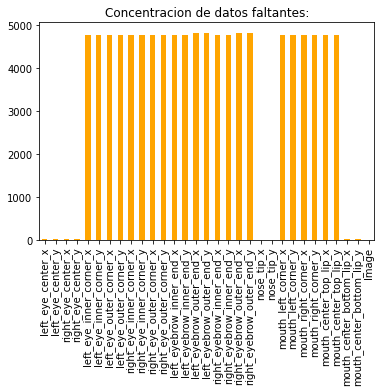

In [91]:
display(train_data.isnull().sum())
train_data.isnull().sum().plot(kind='bar',color = 'orange')
plt.title("Concentracion de datos faltantes:")
plt.show()

Llenar datos faltantes:

In [92]:
train_data.fillna(method = 'ffill',inplace = True)

### Visualizar una imagen del dataset Facial keypoints:

In [93]:
img_dt = []

for i in range(len(train_data)):
  img_dt.append(train_data['Image'][i].split(' '))
  
X = np.array(img_dt, dtype='float')
X_train1 = X # Crear copia para visualizar los datos

In [52]:
foto = X_train1[0]

In [53]:
type(foto)

numpy.ndarray

In [54]:
foto.reshape(96,96)

array([[238., 236., 237., ..., 250., 250., 250.],
       [235., 238., 236., ..., 249., 250., 251.],
       [237., 236., 237., ..., 251., 251., 250.],
       ...,
       [186., 183., 181., ...,  52.,  57.,  60.],
       [189., 188., 207., ...,  61.,  69.,  78.],
       [191., 184., 184., ...,  70.,  75.,  90.]])

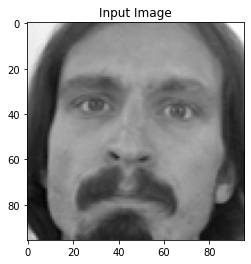

In [55]:
plt.imshow(X_train1[0].reshape(96,96), cmap='gray')
plt.title("Input Image")
plt.show()

In [56]:
facial_pts_data = train_data.drop(['Image'], axis=1)
facial_pts = []

for i in range(len(facial_pts_data)):
  facial_pts.append(facial_pts_data.iloc[i])
  
y = np.array(facial_pts, dtype='float')
t = facial_pts_data.iloc[0].values

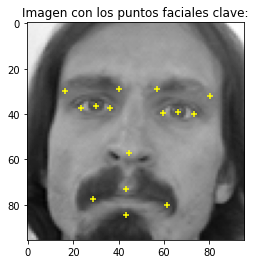

In [65]:
plt.imshow(X_train1[0].reshape(96,96), cmap='gray')
plt.scatter(t[0::2], t[1::2], c='yellow', marker='+')
plt.title("Imagen con los puntos faciales clave:")
plt.show()

## Prediction Model Training usando CNN :

## Division de datos en Train/test/val split

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.2, random_state=0)

NameError: ignored